##Dodanie bibliotek

In [1]:
!pip install fastbook
import fastbook
from fastbook import *
from fastai.vision.widgets import *
from IPython.core.pylabtools import figsize

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 719 kB 15.9 MB/s 
     |████████████████████████████████| 4.4 MB 59.4 MB/s 
     |████████████████████████████████| 362 kB 68.5 MB/s 
     |████████████████████████████████| 1.2 MB 50.1 MB/s 
     |████████████████████████████████| 212 kB 86.8 MB/s 
     |████████████████████████████████| 1.1 MB 59.3 MB/s 
     |████████████████████████████████| 101 kB 9.1 MB/s 
     |████████████████████████████████| 140 kB 30.6 MB/s 
     |████████████████████████████████| 596 kB 64.5 MB/s 
     |████████████████████████████████| 127 kB 69.0 MB/s 
     |████████████████████████████████| 271 kB 87.9 MB/s 
     |████████████████████████████████| 94 kB 4.1 MB/s 
     |████████████████████████████████| 144 kB 72.8 MB/s 
     |████████████████████████████████| 6.6 MB 14.1 MB/s 
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.24.3
    Uninstal

###Zamontowanie dysku google


In [2]:
import os
from google.colab import drive
drive.mount('/content/drive')
os.chdir('/content/drive/My Drive/PUMs21074')
path = Path('/content/drive/My Drive/PUMs21074')

Mounted at /content/drive


##Dane treningowe

In [3]:
klasy = 'Mesocricetus auratus', 'Cavia porcellus', 'Hydrochoerus' # chomik syryjski, świnka morska(kawia domowa), kapibara
path = Path('treningowe') 
if not path.exists(): 
  path.mkdir()
  for o in klasy:
    dest = (path/o)
    dest.mkdir(exist_ok=True)
    urls = search_images_ddg(f' {o} animal', max_images=25)
    download_images(dest, urls=urls)

##Trenowanie modelu

In [17]:
classes = ['class_1', 'class_2', 'class_3']

data = DataBlock(
  blocks=(ImageBlock, CategoryBlock),
  get_items=get_image_files,
  splitter=RandomSplitter(valid_pct=0.3,seed=42), #was 0.2
  get_y=parent_label,
  item_tfms=Resize(128)
)

data = data.new(
    item_tfms=RandomResizedCrop(224, min_scale=0.5), # Określamy ilość materiałów treningowych oraz walidacyjnych, wielkość zdjęć, augmentację
    batch_tfms=aug_transforms(max_rotate=2.0)
)
dls = data.dataloaders(path, bs = 32, num_workers = 0)
# W fastai 2.0 dane przedstawiane są w formie DataBlock, to tutaj dokonujemy augmentacji danych

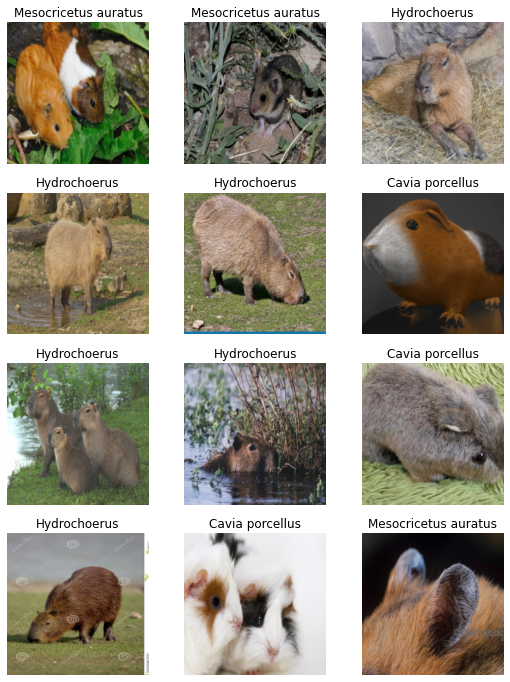

In [6]:
dls.valid.show_batch(max_n=12, nrows=4)

In [18]:
learn = vision_learner(dls, alexnet, metrics=[accuracy, F1Score(axis=-1, labels=None, pos_label=1, average="weighted", sample_weight=None)])

In [22]:
learn.fit(50, cbs=[EarlyStoppingCallback( patience=5), SaveModelCallback()])

epoch,train_loss,valid_loss,accuracy,f1_score,time
0,0.067705,0.866420,0.857143,0.854367,00:03
1,0.066255,0.861175,0.857143,0.854367,00:03
2,0.095978,0.867817,0.857143,0.854367,00:03
3,0.095631,0.876223,0.857143,0.854367,00:03
4,0.082167,0.886730,0.857143,0.854367,00:03
5,0.084356,0.870939,0.857143,0.854367,00:03
6,0.081279,0.873567,0.857143,0.854367,00:03


Better model found at epoch 0 with valid_loss value: 0.8664200305938721.
Better model found at epoch 1 with valid_loss value: 0.8611751794815063.
No improvement since epoch 1: early stopping


In [25]:
learn.save('stage-1')
learn.export(fname='small-mammals-model.pkl')